# Power Outages
This project uses major power outage data in the continental U.S. from January 2000 to July 2016. Here, a major power  outage is defined as a power outage that impacted at least 50,000 customers or caused an unplanned firm load loss of atleast 300MW. Interesting questions to consider include:
- Where and when do major power outages tend to occur?
- What are the characteristics of major power outages with higher severity? Variables to consider include location, time, climate, land-use characteristics, electricity consumption patterns, economic characteristics, etc. What risk factors may an energy company want to look into when predicting the location and severity of its next major power outage?
- What characteristics are associated with each category of cause?
- How have characteristics of major power outages changed over time? Is there a clear trend?

### Getting the Data
The data is downloadable [here](https://engineering.purdue.edu/LASCI/research-data/outages/outagerisks).

A data dictionary is available at this [article](https://www.sciencedirect.com/science/article/pii/S2352340918307182) under *Table 1. Variable descriptions*.

### Cleaning and EDA
- Note that the data is given as an Excel file rather than a CSV. Open the data in Excel or another spreadsheet application and determine which rows and columns of the Excel spreadsheet should be ignored when loading the data in pandas.
- Clean the data.
    - The power outage start date and time is given by `OUTAGE.START.DATE` and `OUTAGE.START.TIME`. It would be preferable if these two columns were combined into one datetime column. Combine `OUTAGE.START.DATE` and `OUTAGE.START.TIME` into a new datetime column called `OUTAGE.START`. Similarly, combine `OUTAGE.RESTORATION.DATE` and `OUTAGE.RESTORATION.TIME` into a new datetime column called `OUTAGE.RESTORATION`.
- Understand the data in ways relevant to your question using univariate and bivariate analysis of the data as well as aggregations.

*Hint 1: pandas can load multiple filetypes: `pd.read_csv`, `pd.read_excel`, `pd.read_html`, `pd.read_json`, etc.*

*Hint 2: `pd.to_datetime` and `pd.to_timedelta` will be useful here.*

*Tip: To visualize geospatial data, consider [Folium](https://python-visualization.github.io/folium/) or another geospatial plotting library.*

### Assessment of Missingness
- Assess the missingness of a column that is not missing by  design.

### Hypothesis Test
Find a hypothesis test to perform. You can use the questions at the top of the notebook for inspiration.

# Summary of Findings

### Introduction
We are focusing on the question: Where and when do major power outages tend to occur? 
- To determine which state of the U.S. tend to occur the power outage.
- To determine when (especially which hour of a day) tend to occur the power outage. 

### Cleaning and EDA
* **Clean the data:** Original data gives us a 6-categroies and 56-columns data set. In our focused project:  
  - 1. We only select U.S._STATE, POSTAL.CODE, NERC.REGION, CLIMATE.REGION, CLIMATE.CATEGORY, OUTAGE.START.DATE, OUTAGE.START.TIME, OUTAGE.RESTORATION.DATE, OUTAGE.RESTORATION.TIME, CUSTOMERS.AFFECTED, CAUSE.CATEGORY, OUTAGE.DURATION, DEMAND.LOSS.MW (12 columns) to fit our focused question to determine.
  - 2. After dropping useless columns from dataframe, we decide to drop all rows with NaN value in the columns of 'DEMAND.LOSS.MW','CUSTOMERS.AFFECTED'. We try to ensure the cleaned data be useable for our analysis.
  - 3. According to power outage definition, we clean the DEMAND.LOSS.MW column in at least 300 or CUSTOMERS.AFFECTED at least 50000.
  
* **Univariate Analysis:**
  - 4. For analyzing the relationship between region (U.S. state) and tended occurance of outage, we use U.S._STATE column, counting the value of occurance to draw the bar plot 
  - 5. For analyzing the relationship between when (especially month) and tended occurance of outage, we pick the only month from Datetime, counting the occurance to draw bar plot, scatter plot and boxplot.

* **Bivariate Analysis:**
  - Here we do to demonstrate our groupby statistic of each column with the corresponding state. We groupby the statistic of U.S. states, calculating the mean value, standard deviation, median and variance.

### Assessment of Missingness

* **Column of in DEMAND.LOSS.MW with outage start hour**
 - Default significance level we pick: 10%
 - Null Hypothesis: The missingness in DEMAND.LOSS.MW is not related to outage start hour
 - Alternate Hypothesis: The missingness in DEMAND.LOSS.MW is related to outage start hour
 - The p-value shows 0.201 > 0.1, therefore we reject the Null Hypothesis. The missingness in DEMAND.LOSS.MW is related to outage start hour.

* **Column of in DEMAND.LOSS.MW with TOTAL.SALES column**
- Default significance level we pick: 10%
 - Null Hypothesis: The missingness in DEMAND.LOSS.MW is not related to total sales of electricity.
 - Alternate Hypothesis: The missingness in DEMAND.LOSS.MW is related to total sales of electricity.
 - The p-value shows 0.0 < 10%, therefore we can not reject the Null Hypothesis. The missingness in DEMAND.LOSS.MW is not related to total sales of electricity.

### Hypothesis Test
* **Relationship between Where: U.S STATE and Power Outage Occur**
 - Null Hypothesis: Less than 15 percentage of major power outage occurs at California
 - Alternate Hypothesis: At least 15 percentage of major power outage occurs at California


* **Relationship between When: Exact Hour and Power Outage Occur**
 - Null Hypothesis: The most power outage not occur in year of 2004
 - Alternate Hypothesis: The most power outage occur in year of 2004


# Code

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

### Cleaning and EDA

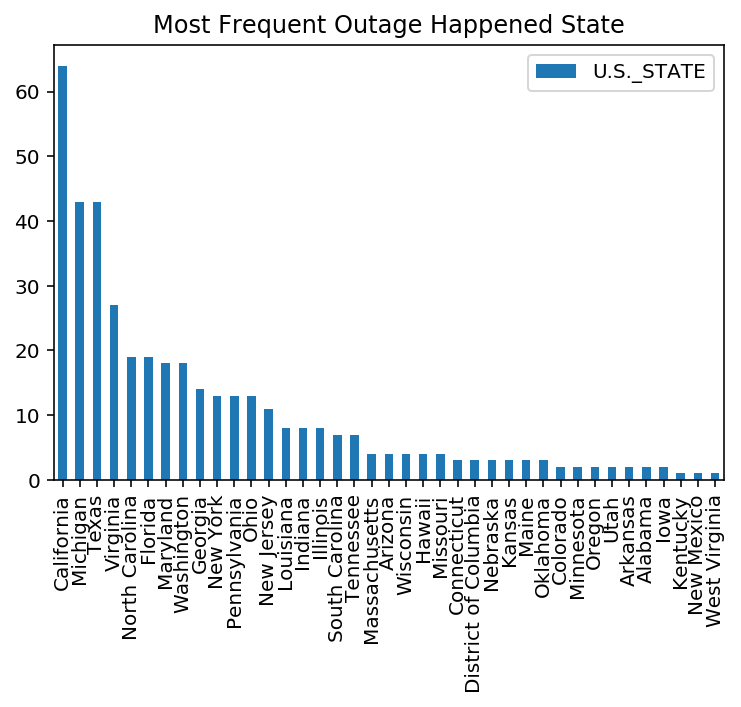

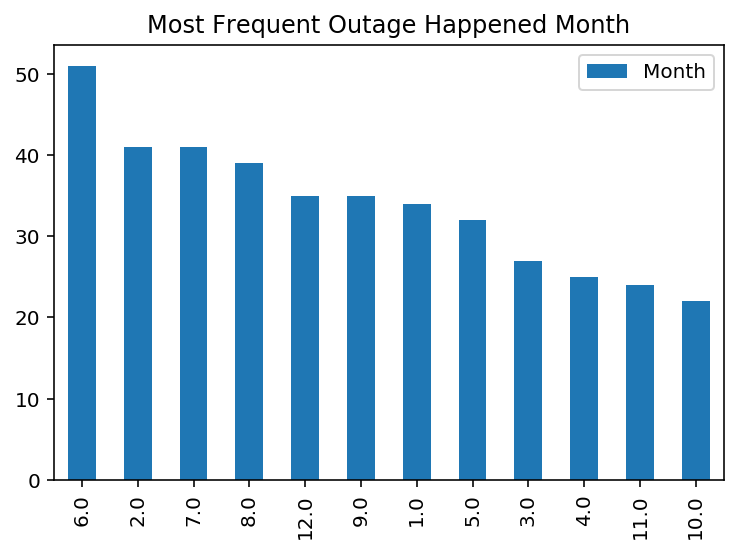

In [81]:
#Using pd.read_excel to read the datafile while getting rid of useless titles on top of the 
#data table to read the data into a clean dataframe
df = pd.read_excel('outage.xlsx',header = 4).drop('variables',1)

#We are trying to answer first question so we dropped other irrelevant columns from the dataframe
when_where = df[['U.S._STATE','POSTAL.CODE','NERC.REGION','CLIMATE.REGION','CLIMATE.CATEGORY','OUTAGE.START.DATE','OUTAGE.START.TIME','OUTAGE.RESTORATION.DATE','OUTAGE.RESTORATION.TIME','CUSTOMERS.AFFECTED','CAUSE.CATEGORY','OUTAGE.DURATION','DEMAND.LOSS.MW']]
#We decided to drop all rows with NaN
when_where = when_where.dropna(subset=['DEMAND.LOSS.MW','CUSTOMERS.AFFECTED'])
when_where = when_where[(when_where['DEMAND.LOSS.MW'] >= 300) | (when_where['CUSTOMERS.AFFECTED'] >= 50000)]
when_where['Month'] = pd.DatetimeIndex(when_where['OUTAGE.START.DATE']).month
when_where['Year'] = pd.DatetimeIndex(when_where['OUTAGE.START.DATE']).year
when_where['Day'] = pd.DatetimeIndex(when_where['OUTAGE.START.DATE']).day
most_loc = when_where['U.S._STATE'].value_counts()
most_loc.to_frame().plot(kind='bar',title='Most Frequent Outage Happened State')
most_time = when_where
most_time['OUTAGE.START.DATE'] = pd.to_datetime(most_time['OUTAGE.START.DATE'])
most_time['Month'] = pd.DatetimeIndex(most_time['OUTAGE.START.DATE']).month
most_time =most_time['Month'].value_counts()
most_time.to_frame().plot(kind = 'bar', title = 'Most Frequent Outage Happened Month')

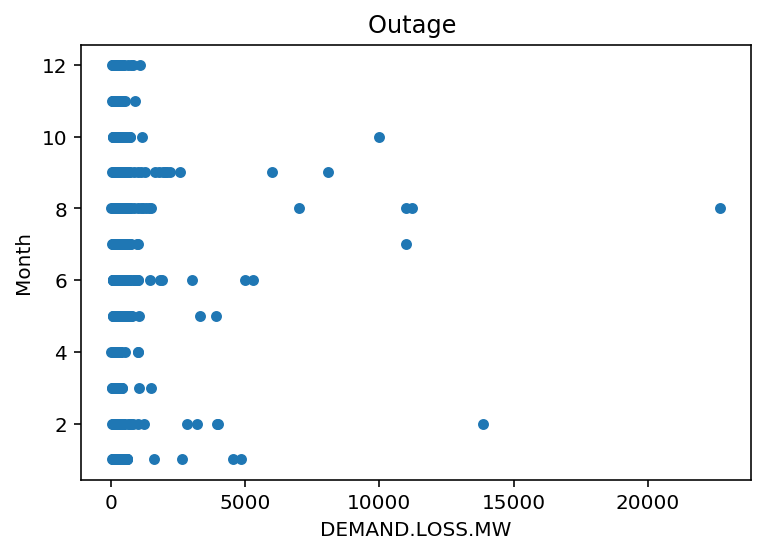

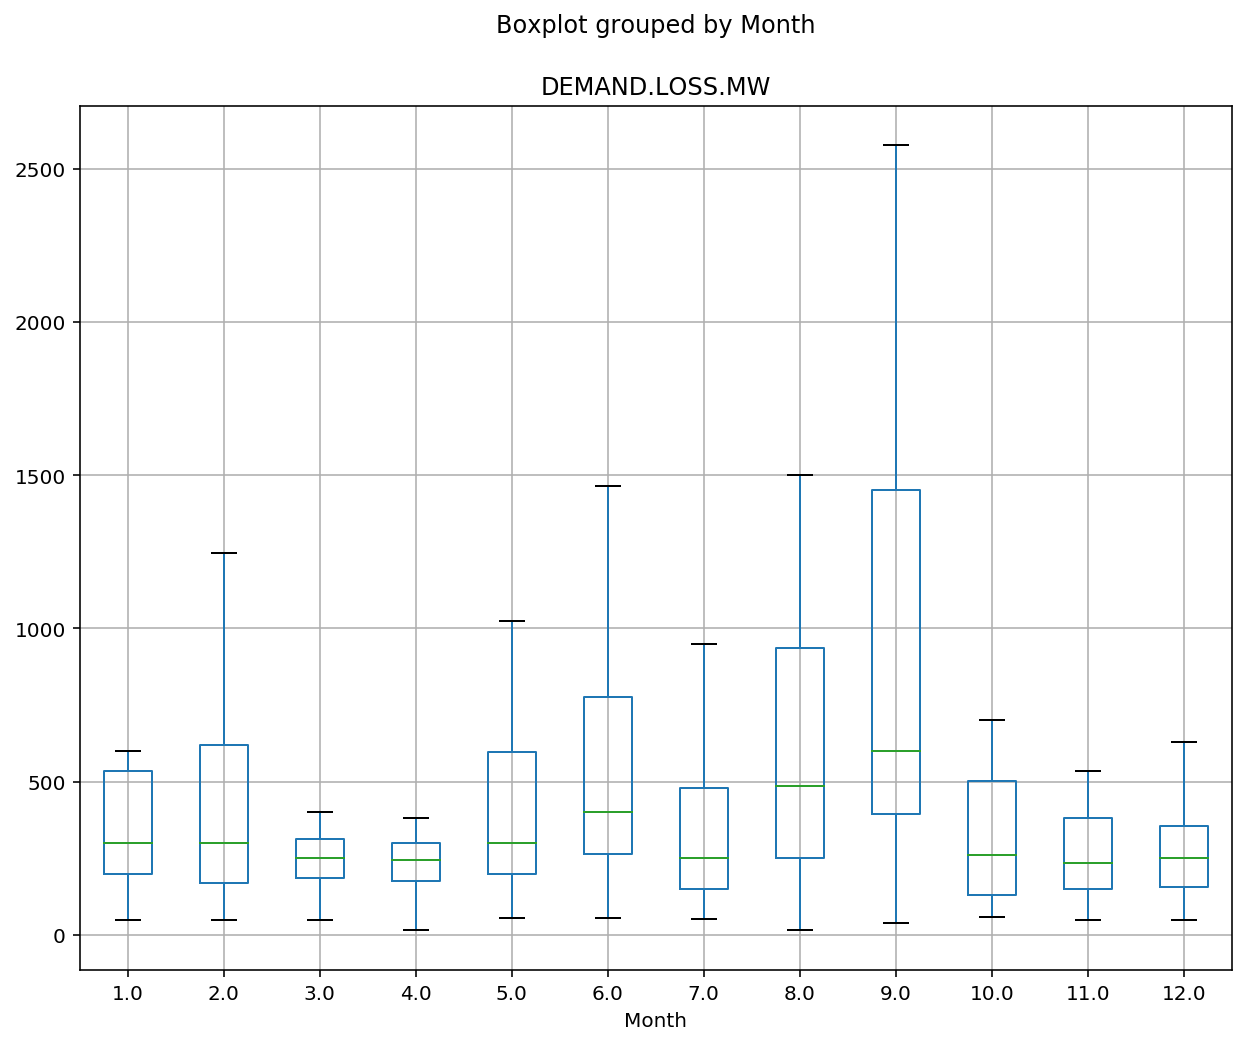

In [82]:
when_where['DEMAND.LOSS.MW']=when_where['DEMAND.LOSS.MW'].astype(int)
when_where.plot(kind='scatter',x='DEMAND.LOSS.MW',y='Month',title='Outage ')
boxplot=when_where.boxplot(column='DEMAND.LOSS.MW',by='Month',figsize=(10,8),showfliers=False)
# This cell is used to plot correlations between columns in our dataframe

In [90]:
when_where.groupby('U.S._STATE').mean()
when_where.groupby('U.S._STATE').std()
when_where.groupby('U.S._STATE').median()
when_where.groupby('U.S._STATE').var()
#This column is used to demonstrate our groupby statistic of each column with the corresponding state

,CUSTOMERS.AFFECTED,DEMAND.LOSS.MW,Month,Year,Day
U.S._STATE,,,,,
Alabama,1.087831e+09,1.110050e+04,0.500000,0.500000,24.500000
Arizona,2.393667e+09,5.448390e+06,5.666667,21.333333,252.916667
Arkansas,1.359650e+10,1.250000e+03,24.500000,8.000000,24.500000
California,2.702309e+11,3.330724e+06,15.952133,13.958085,77.125992
Colorado,1.515692e+09,1.125000e+04,0.500000,0.500000,84.500000
Connecticut,1.660987e+08,1.675000e+03,4.000000,6.333333,89.333333
District of Columbia,4.791633e+10,2.297200e+06,5.333333,0.333333,120.333333
Florida,8.256607e+11,6.166894e+06,9.988304,7.362573,92.912281
Georgia,7.213597e+09,3.424912e+05,13.719780,16.401099,44.835165


### Assessment of Missingness

In [145]:
df = pd.read_excel('outage.xlsx',header = 4).drop('variables',1)
df = df[['DEMAND.LOSS.MW','OUTAGE.START.TIME']]
df = df.dropna(subset = ['OUTAGE.START.TIME'])
df = df.iloc[1:]
df['OUTAGE.START.TIME'] = df['OUTAGE.START.TIME'].apply(lambda x:x.hour)


null = df[df['DEMAND.LOSS.MW'].isnull()]['OUTAGE.START.TIME'].mean()
not_null = df[df['DEMAND.LOSS.MW'].notnull()]['OUTAGE.START.TIME'].mean()
print(not_null)
obs = not_null - null

result = []
for i in range(1000):
    shuffle = df.assign(**{'shuffled_hour': df['OUTAGE.START.TIME'].sample(replace=False, frac=1).reset_index(drop=True)})
    shuffled_null = shuffle[shuffle['DEMAND.LOSS.MW'].isnull()]['shuffled_hour'].mean()
    shuffled_notnull = shuffle[shuffle['DEMAND.LOSS.MW'].notnull()]['shuffled_hour'].mean()
    result.append(shuffled_notnull - shuffled_null)
ans = 0
for i in result:
    if i >= obs:
        ans+=1
p_val = ans/1000
p_val
#This cell assess the missingess in DEMAND.LOSS.MW with outage start hour
#We performed permutation test and resulted in a p-val of our test in which rejects the null
#hypothesis meaning that the missingness in DEMAND.LOSS.MW is related to outage start hour

12.380315917375455


0.201

In [143]:
df = pd.read_excel('outage.xlsx',header = 4).drop('variables',1)
df = df[['DEMAND.LOSS.MW','TOTAL.SALES']]
df = df.dropna(subset = ['TOTAL.SALES'])
df = df.iloc[1:]

null = df[df['DEMAND.LOSS.MW'].isnull()]['TOTAL.SALES'].mean()
not_null = df[df['DEMAND.LOSS.MW'].notnull()]['TOTAL.SALES'].mean()
obs = not_null - null

result = []
for i in range(1000):
    shuffle = df.assign(**{'shuffled_affected': df['TOTAL.SALES'].sample(replace=False, frac=1).reset_index(drop=True)})
    shuffled_null = shuffle[shuffle['TOTAL.SALES'].isnull()]['shuffled_affected'].mean()
    shuffled_notnull = shuffle[shuffle['TOTAL.SALES'].notnull()]['shuffled_affected'].mean()
    result.append(shuffled_notnull - shuffled_null)
ans = 0
for i in result:
    if i >= obs:
        ans+=1
p_val = ans/1000
p_val
#This cell performs a permutation test to see if the missingness in DEMAND.LOSS.MW is related to
#TOTAL.SALES column, our pval is less than 0.05 which fails to reject null meaning that
#there is no correlation between missingness in DEMAND.LOSS.MW and TOTAL.SALES

0.0

### Hypothesis Test

In [177]:
df = pd.read_excel('outage.xlsx',header = 4).drop('variables',1)

df = df[['DEMAND.LOSS.MW','U.S._STATE','CUSTOMERS.AFFECTED','YEAR']].iloc[1:]
df = df.dropna()
df = df[(df['DEMAND.LOSS.MW'] >= 300) | (when_where['CUSTOMERS.AFFECTED'] >= 50000)]
obs = df['U.S._STATE'].value_counts()/df['U.S._STATE'].value_counts().sum()
obs = obs.loc['California']

result = []
for i in range(1000):
    samp = df.sample(64, replace = False)
    tbl = samp['U.S._STATE'].value_counts()/samp['U.S._STATE'].value_counts().sum()
    result.append(tbl.loc['California'])

ans = 0
for i in result:
    if float(i) >= obs:
        ans+=1
pval = ans/1000
pval
#This cell is used to run hypothesis test on whether or not most major power outage occurs at california 15% of the time
#- Null Hypothesis: Less than 15 percentage of major power outage occurs at California
#- Alternate Hypothesis: At least 15 percentage of major power outage occurs at California
#Test statistic is percent of major outage occured at California,
#significance level is by default 0.05
#resulting pval ~ 0.4 
# Reject null meaning that yes,most major power outage do occur at California

0.4

In [188]:
df = pd.read_excel('outage.xlsx',header = 4).drop('variables',1)

df = df[['DEMAND.LOSS.MW','U.S._STATE','CUSTOMERS.AFFECTED','YEAR']].iloc[1:]
df = df.dropna()
df = df[(df['DEMAND.LOSS.MW'] >= 300) | (when_where['CUSTOMERS.AFFECTED'] >= 50000)]
obs = df['YEAR'].value_counts()/df['YEAR'].value_counts().sum()
obs = obs.index[0]

result = []
for i in range(1000):
    samp = df.sample(49, replace = False)
    tbl = samp['YEAR'].value_counts()/samp['YEAR'].value_counts().sum()
    data = tbl.index[0]
    if data == 2004.0:
        result.append(1)
pval = len(result)/1000
pval

#This cell is used to run hypothesis test on whether or not most major power outage occurs in 2004
#- Null Hypothesis: The most power outage not occur in year of 2004
#- Alternate Hypothesis: The most power outage occur in year of 2004
#Test statistic is percent of major outage occured at California,
#significance level is by default 0.05
#resulting pval ~ 0.4 
# Reject null meaning that yes,most major power outage do occur at California

0.288